In [78]:
import numpy as np
class KNN:
    def __init__(self,k):
        self.n_neighbours=k
        self.X_train= None
        self.y_train= None

    def train(self,X_train,y_train):
        self.X_train= X_train
        self.y_train= y_train

    def predict(self,x_test):
        predictions=[]
        for test in x_test:
            i=0
            distances=[]
            for points in self.X_train :
                 val= np.sqrt(((points[0]-test[0])**2)+  ##taking Euclidean distance
                         ((points[1]-test[1])**2))
                        
                 distances.append((val,i))
                 i+=1

            distances.sort(key=lambda x: x[0]) ##sort the distances 

            ycount=0 
            ncount=0

            for i in range(0,self.n_neighbours):
                if(self.y_train[distances[i][1]]):
                    ycount+=1
                else:
                     ncount+=1
        
            if(ycount>ncount):
                predictions.append(1)
            else:
                predictions.append(0)
            
        return predictions

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
df= pd.read_csv('Social_Network_Ads.csv')
df.head(8)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1


In [81]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [82]:
X= df.iloc[:, :-1].values
y= df.iloc[:, -1].values
print(X)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)
print('Training shape is',x_train.shape)
print('Test shape is',x_test.shape)

Training shape is (320, 2)
Test shape is (80, 2)


In [84]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)
print(x_test[0:5])

[[-0.79895082  0.49460758]
 [-0.02126485 -0.57735906]
 [-0.31289709  0.14694273]
 [-0.79895082  0.26283101]
 [-0.31289709 -0.57735906]]


## Testing the model

In [85]:
knn= KNN(4)
knn.train(x_train,y_train)
y_pred= knn.predict(x_test)
print(y_pred)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]


In [86]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[55  3]
 [ 1 21]]


## Checking the accuracy of model for various values of K

In [90]:
from sklearn.metrics import accuracy_score
asc= accuracy_score(y_test,y_pred)
print('Accuracy of model with k= 4 is ',asc*100,'%')

Accuracy of model with k= 4 is  95.0 %


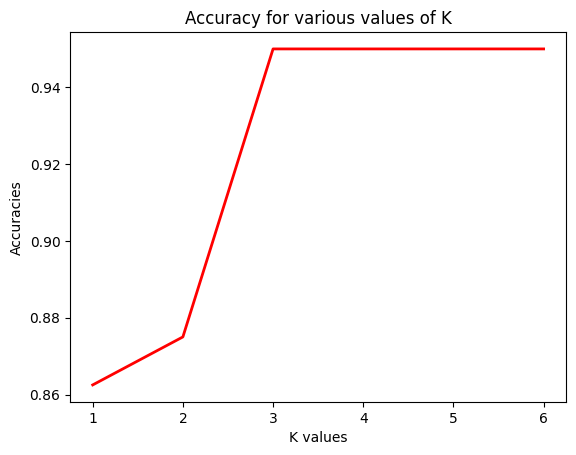

In [92]:
accuracies=[]
for i in range (1,7):
    knn= KNN(i)
    knn.train(x_train,y_train)
    y_pred= knn.predict(x_test)
    asc= accuracy_score(y_test,y_pred)
    accuracies.append(asc)

x=np.array([1,2,3,4,5,6])
y=accuracies

plt.plot(x,y,color='red',linewidth=2)
plt.xlabel('K values')
plt.ylabel('Accuracies')
plt.title('Accuracy for various values of K')
plt.show()
    